In [1]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.termination.default import DefaultMultiObjectiveTermination
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.termination import get_termination
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import Aq_Optimization_functons
from Aq_Optimization_functons import *
import time

/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 500

- My experience: generation is 500 ~ 100. Population is 200, Pc = 0.6, Pm = 0.01
    
- This is my experience.
 I often test the next parameters and 30 independent runs:
 population size: 50, 100, 200
 number of generations: 100, 200, 500
 mutation probability: 0.1, 0.2, 0.5, and sometimes 0.8, 1.0
 crossover rate: 0.9, 0.8, 0.6
 In population size, number of generations, and mutation probability I always starts with the lower values. In   crossover rate start in a decreasing way. The population size and the number of generation have an impact in   the execution time of the algorithm. Also, something I like to do is to check in which generation the best     fitness value is achieved.
 Well, I hope this helps you.
 
 
 
 
 
 - Explanation of Defaults eta=15 for SBX (Crossover). This keeps offspring somewhat similar to parents but still allows exploration. Lower values (e.g., eta=5) increase randomness in offspring. eta=20 for PM (Mutation)

Higher values make mutations small and precise (fine-tuning).
Lower values (e.g., eta=5) create larger jumps in parameter values, increasing exploration.

- Simulated Binary Crossover (SBX) → prob = 1.0 (100%)
- Polynomial Mutation (PM) → prob = 1/n_var (1 divided by the number of decision variables)
- For example, if you're optimizing 7 parameters, then prob = 1/7 ≈ 0.14 (14% mutation probability per parameter).

## MAE

In [21]:
class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=2, n_constr=0, 
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    
    def _evaluate(self, X, out, *args, **kwargs):
        results = []

        for params in X:
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Run AquaCrop model (assuming for_objf() is correctly defined)
            _, all_yld_df, simul_reported = for_objf(smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, a_HI=a_HI, Zmax=Zmax, train = False)

            # Compute mae values
            mae_yield = calculate_mae(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')
            mae_irrigation = calculate_mae(simul_reported, 'Seasonal irrigation (mm)', 'Reported_Irrigation')


            results.append([mae_yield, mae_irrigation])

        out["F"] = np.array(results)  # Ensure correct shape



def calculate_mae(df, sim_col, obs_col):
    df = df.dropna(subset=[sim_col, obs_col])
    obs = df[obs_col].values
    sim = df[sim_col].values
    return np.mean(np.abs(obs - sim))



start_time = time.time()
problem = AquaCropCalibration()

# Configure the algorithm
algorithm = NSGA2(
    pop_size=6,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.6, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# termination = DefaultMultiObjectiveTermination()
termination = get_termination("n_gen", 2)

# Run the optimization
res = minimize(problem, algorithm, termination, seed=1, verbose=True)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time elapsed for parallel evaluation: {elapsed_time:.2f} seconds")

best_index = np.argmin(res.F[:, 1])
best_params = res.X[best_index]
best_mae_values = res.F[best_index]


print("\nOptimized Parameters (Best Solution):", best_params)
print("Corresponding MAE (Yield, Irrigation):", best_mae_values)

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |        6 |      3 |             - |             -
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123


/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123


/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


100 prcnt_without_ET: 123
100 prcnt_without_ET: 123


/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123


/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
     2 |       12 |      4 |  0.0333155494 |         ideal
Time elapsed for parallel evaluation: 272.46 seconds

Optimized Parameters (Best Solution): [59.66583267 61.22248482 54.20665988 53.67837985  0.86341938 32.23946763
  1.09085955  0.47936141  3.23386572  1.36903714]
Corresponding MAE (Yield, Irrigation): [ 2.85712724 60.98485902]


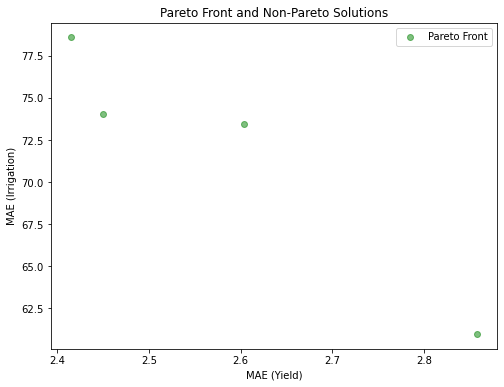

In [22]:
# Extract objective values from the optimization result
F = res.F  # Shape (n_solutions, 2), columns: [mae_Yield, mae_Irrigation]

plt.figure(figsize=(8, 6))
plt.scatter(F[:, 0], F[:, 1], color='g', alpha=0.5, label="Pareto Front")

# Highlight the Pareto front solutions
# plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color='red', label="Pareto Front")
plt.xlabel('MAE (Yield)')
plt.ylabel('MAE (Irrigation)')
plt.legend()
plt.title("Pareto Front and Non-Pareto Solutions")
plt.show()


In [23]:
# Create DataFrame with mae values
results_df = pd.DataFrame(res.F, columns=['MAE (Yield)', 'MAE (Irrigation)'])


# Add SMTs and other parameters
results_df['smt_1'] = res.X[:, 0]
results_df['smt_2'] = res.X[:, 1]
results_df['smt_3'] = res.X[:, 2]
results_df['smt_4'] = res.X[:, 3]
results_df['CCx'] = res.X[:, 4]
results_df['WP'] = res.X[:, 5]
results_df['Kcb'] = res.X[:, 6]
results_df['HI0'] = res.X[:, 7]
results_df['a_HI'] = res.X[:, 8]
results_df['Zmax'] = res.X[:, 9]

# Print the DataFrame with the results
print("Optimization Results:")
results_df

Optimization Results:


,MAE (Yield),MAE (Irrigation),smt_1,smt_2,smt_3,smt_4,CCx,WP,Kcb,HI0,a_HI,Zmax
0,2.603134,73.473248,42.575835,60.278293,53.066784,56.343523,0.853560,33.352338,1.04173,0.505869,1.833676,1.457532
1,2.857127,60.984859,59.665833,61.222485,54.206660,53.678380,0.863419,32.239468,1.09086,0.479361,3.233866,1.369037
2,2.414908,78.589932,32.950405,56.316614,64.368343,45.994959,0.939944,31.577578,1.06865,0.531425,0.673739,2.175188
3,2.449589,74.047373,31.532167,60.609145,64.008230,56.343523,0.853147,31.581676,1.04173,0.506521,1.833676,1.457161


In [26]:
from joblib import Parallel, delayed


class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=2, n_constr=0, 
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    def _evaluate(self, X, out, *args, **kwargs):
        # Define function to evaluate a single parameter set
        def evaluate_solution(params):
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Run AquaCrop model (assuming `for_objf()` is correctly defined)
            _, all_yld_df, simul_reported = for_objf(
                smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, a_HI=a_HI, Zmax=Zmax, train=False
            )

            # Compute MAE values
            mae_yield = calculate_mae(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')
            mae_irrigation = calculate_mae(simul_reported, 'Seasonal irrigation (mm)', 'Reported_Irrigation')

            return [mae_yield, mae_irrigation]

        # Start time tracking
        start_time = time.time()

        # Parallel execution using all available cores
        num_jobs = 8 # Uses all available cores
        results = Parallel(n_jobs=num_jobs, backend="loky")(
            delayed(evaluate_solution)(params) for params in X
        )

        out["F"] = np.array(results)




def calculate_mae(df, sim_col, obs_col):
    df = df.dropna(subset=[sim_col, obs_col])
    obs = df[obs_col].values
    sim = df[sim_col].values
    return np.mean(np.abs(obs - sim))


# Define problem
start_time = time.time()

problem = AquaCropCalibration()

# Configure the algorithm
algorithm = NSGA2(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.6, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Define termination criteria
termination = get_termination("n_gen", 200)

# Run the optimization
res = minimize(problem, algorithm, termination, seed=1, verbose=True)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed for parallel evaluation: {elapsed_time:.2f} seconds")


# Extract best solution based on lowest MAE for irrigation
best_index = np.argmin(res.F[:, 1])  # Minimize MAE for irrigation
best_params = res.X[best_index]
best_mae_values = res.F[best_index]

# Print results
print("\nOptimized Parameters (Best Solution):", best_params)
print("Corresponding MAE (Yield, Irrigation):", best_mae_values)


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       50 |     10 |             - |             -


KeyboardInterrupt: 

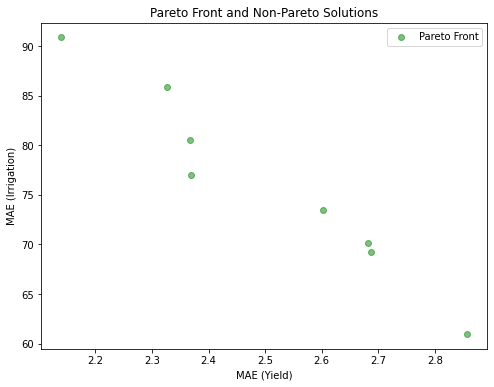

In [25]:
# Extract objective values from the optimization result
F = res.F  # Shape (n_solutions, 2), columns: [mae_Yield, mae_Irrigation]

plt.figure(figsize=(8, 6))
plt.scatter(F[:, 0], F[:, 1], color='g', alpha=0.5, label="Pareto Front")

# Highlight the Pareto front solutions
# plt.scatter(pareto_front[:, 0], pareto_front[:, 1], color='red', label="Pareto Front")
plt.xlabel('MAE (Yield)')
plt.ylabel('MAE (Irrigation)')
plt.legend()
plt.title("Pareto Front and Non-Pareto Solutions")
plt.show()

## using r2 as a metric

In [3]:
class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=2, n_constr=0, 
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    
    def _evaluate(self, X, out, *args, **kwargs):
        results = []
        r2_values = []  # Store raw R² values separately

        for params in X:
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Run AquaCrop model (assuming `for_objf()` is correctly defined)
            _, all_yld_df, simul_reported = for_objf(smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, a_HI=a_HI, Zmax=Zmax, train = False)

            # Compute R² values
            R2_yield = calculate_r2(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')
            R2_irrigation = calculate_r2(simul_reported, 'Seasonal irrigation (mm)', 'Reported_Irrigation')

            # Transform R² for minimization: (1 - R²)
            obj_yield = 1 - R2_yield
            obj_irrigation = 1 - R2_irrigation

            results.append([obj_yield, obj_irrigation])
            r2_values.append([R2_yield, R2_irrigation])

        out["F"] = np.array(results)  # Ensure correct shape
        self.r2_results = np.array(r2_values)  # Store R² results for later


def calculate_r2(df, sim_col, obs_col):
    df = df.dropna(subset=[sim_col, obs_col])
    obs = df[obs_col].values
    sim = df[sim_col].values
    ss_total = np.sum((obs - np.mean(obs)) ** 2)
    ss_residual = np.sum((obs - sim) ** 2)
    return 1 - (ss_residual / ss_total) if ss_total != 0 else np.nan  # Avoid division by zero



problem = AquaCropCalibration()

# Configure the algorithm
algorithm = NSGA2(
    pop_size=120,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=False
)

termination = get_termination("n_gen", 100)

# Run the optimization
res = minimize(problem, algorithm, termination, seed=1, verbose=True)

r2_values = problem.r2_results

# Select only the R² values corresponding to the final solutions
r2_filtered = r2_values[: res.F.shape[0]]

# Find the best solution (highest R² for Yield)
best_index = np.argmin(res.F[:, 0])  # Since we minimize (1 - R²), lower is better
best_params = res.X[best_index]
best_r2_values = r2_values[best_index]

print("\nOptimized Parameters (Best Solution):", best_params)
print("Corresponding R² (Yield, Irrigation):", best_r2_values)



Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wit

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    13 |     1560 |     37 |  0.0039998646 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    18 |     2160 |     48 |  0.0045157771 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    26 |     3120 |     59 |  0.0078539767 |         ideal
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    31 |     3720 |     62 |  0.0054029578 |         nadir
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    44 |     5280 |     92 |  0.0007039146 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    49 |     5880 |    104 |  0.0003526872 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    57 |     6840 |    120 |  0.001181

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    62 |     7440 |    120 |  0.0010580623 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    75 |     9000 |    118 |  0.0010339491 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    80 |     9600 |    113 |  0.0010212882 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
    93 |    11160 |     98 |  0.0010495234 |             f
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 p

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

In [1]:
.76*.76

0.5776

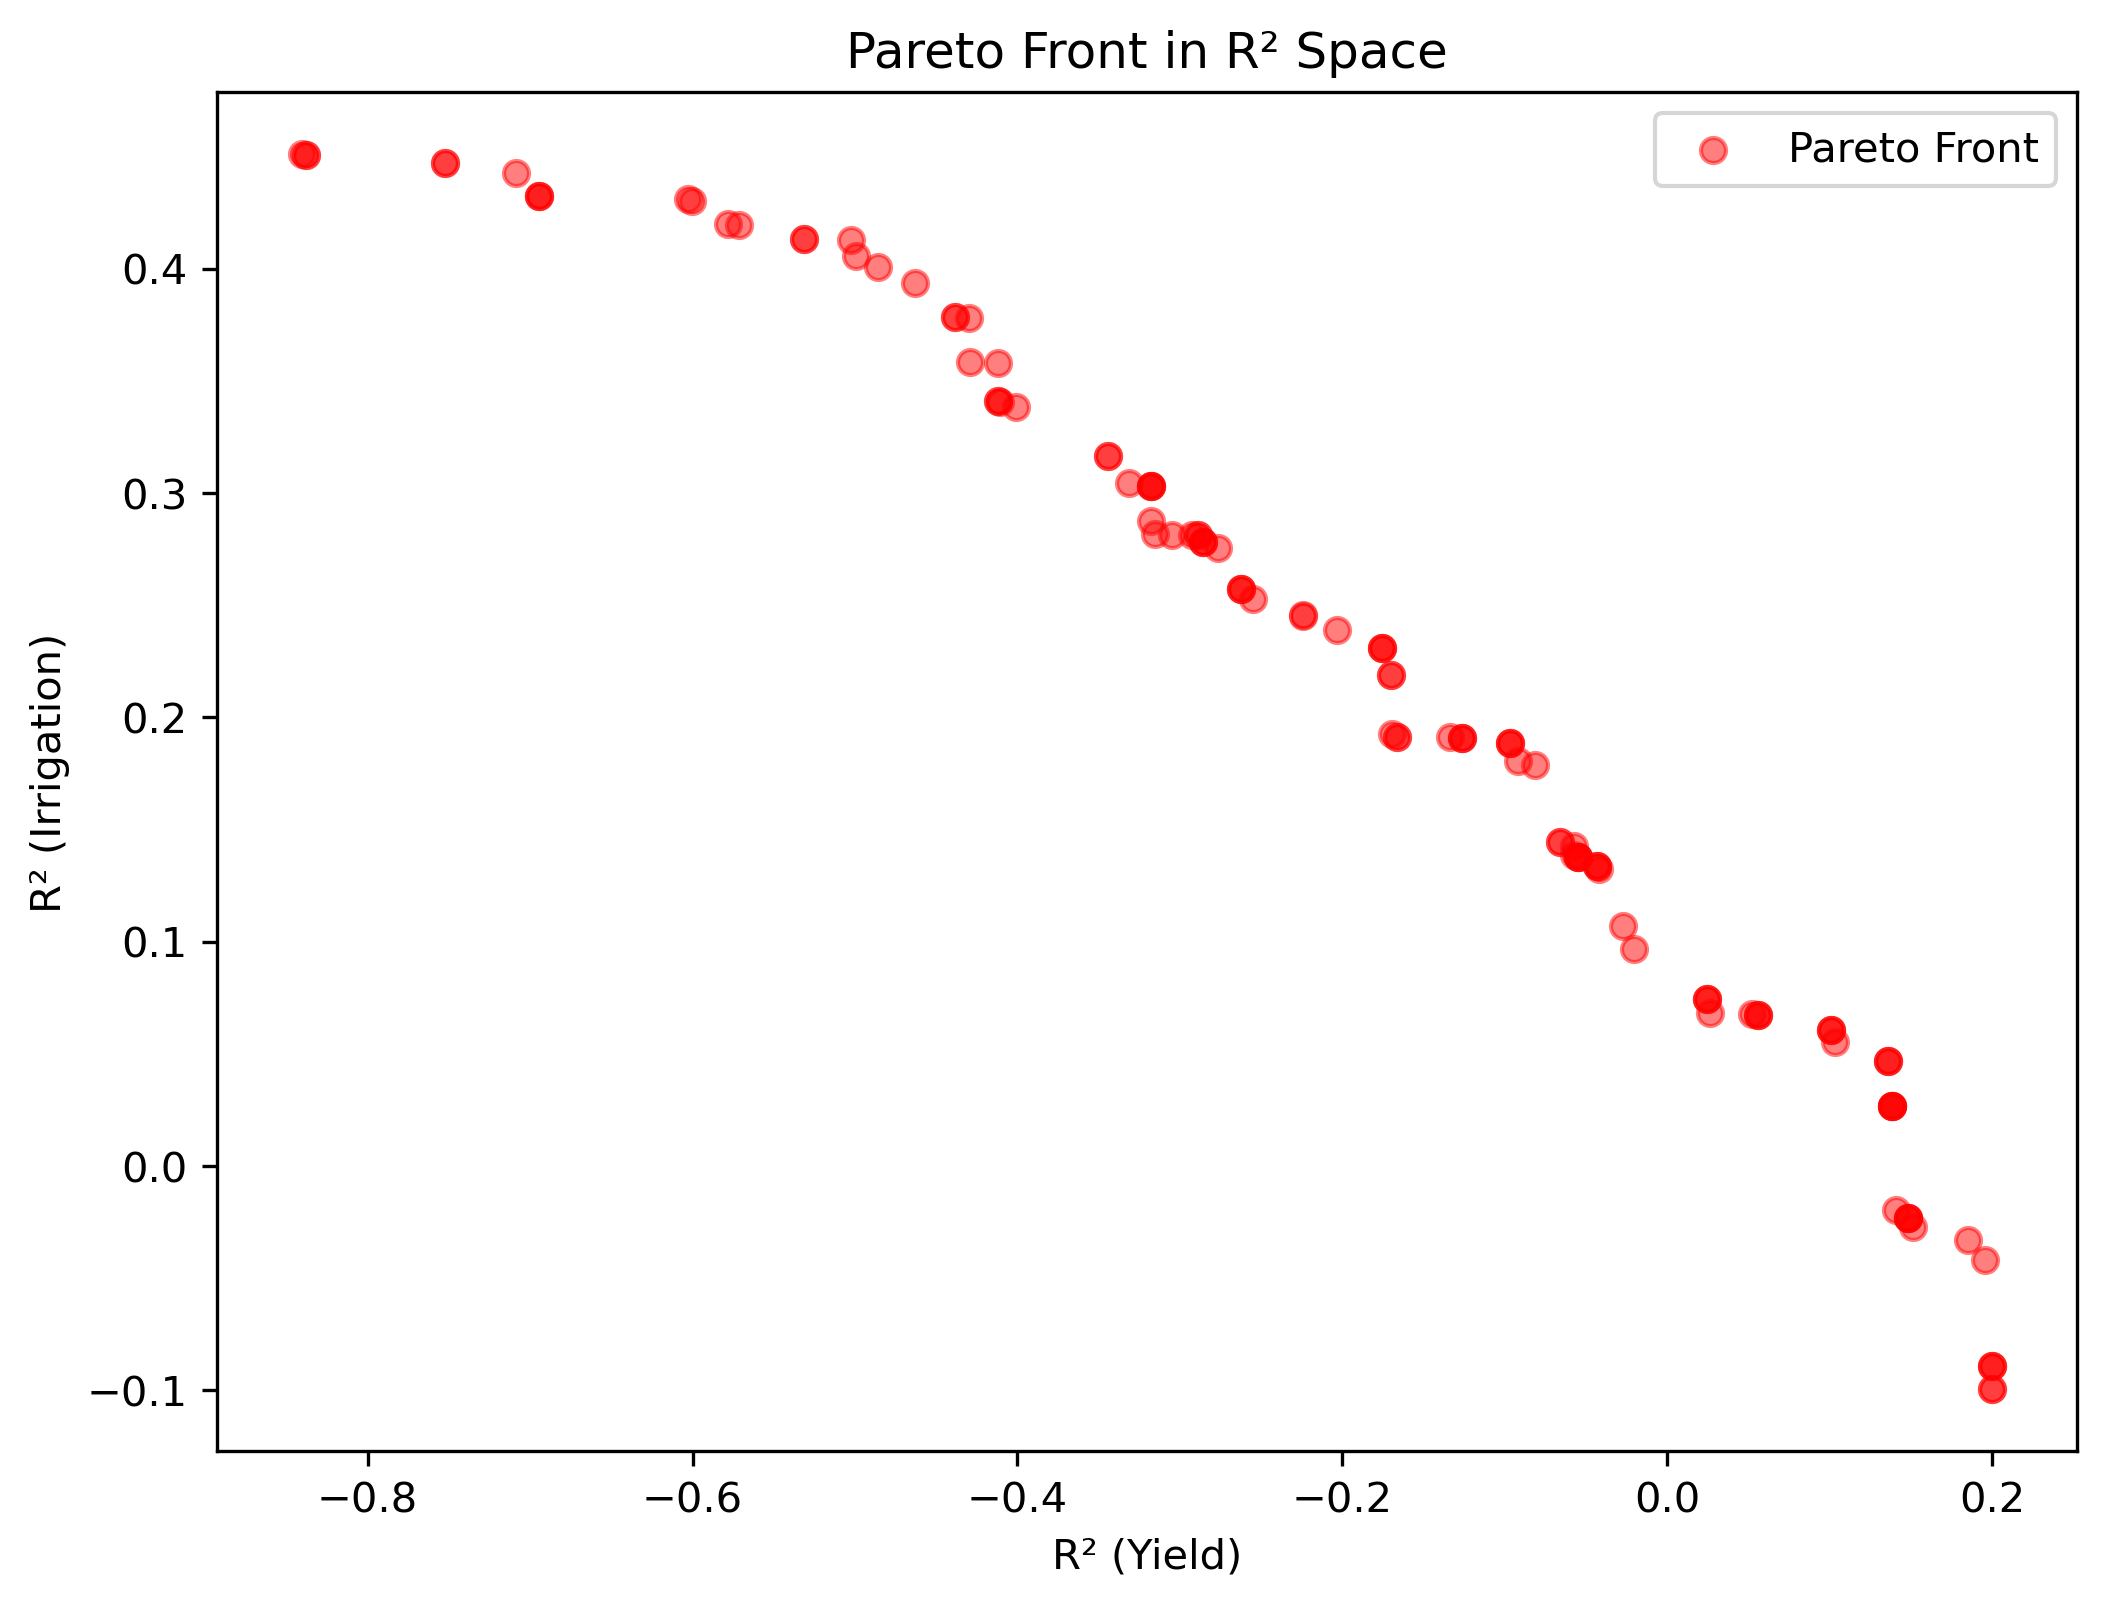

In [8]:


# Extract objective values from the optimization result
F = res.F  # Shape (n_solutions, 2), columns: [1-R2_Yield, 1-R2_Irrigation]

# Convert back to original R² values
R2_Yield = 1 - F[:, 0]
R2_Irrigation = 1 - F[:, 1]

# Scatter plot of all solutions
plt.figure(figsize=(8, 6))
plt.scatter(R2_Yield, R2_Irrigation, color='r', alpha=0.5, label="Pareto Front")

plt.xlabel('R² (Yield)')
plt.ylabel('R² (Irrigation)')
plt.legend()
plt.title("Pareto Front in R² Space with WC fields")
plt.show()


In [9]:
# Create DataFrame with RMSE values
results_df = pd.DataFrame(
    {'R2 (Yield)': R2_Yield, 'R2 (Irrigation)': R2_Irrigation}
)


# Add SMTs and other parameters
results_df['smt_1'] = res.X[:, 0]
results_df['smt_2'] = res.X[:, 1]
results_df['smt_3'] = res.X[:, 2]
results_df['smt_4'] = res.X[:, 3]
results_df['CCx'] = res.X[:, 4]
results_df['WP'] = res.X[:, 5]
results_df['Kcb'] = res.X[:, 6]
results_df['HI0'] = res.X[:, 7]
results_df['a_HI'] = res.X[:, 8]
results_df['Zmax'] = res.X[:, 9]

# Print the DataFrame with the results
print("Optimization Results:")
results_df.sort_values(by="R2 (Irrigation)", ascending = False)


Optimization Results:


,R2 (Yield),R2 (Irrigation),smt_1,smt_2,smt_3,smt_4,CCx,WP,Kcb,HI0,a_HI,Zmax
1,-0.840695,0.451073,59.993691,63.501265,50.669980,59.987375,0.967712,31.511057,1.079990,0.490363,4.120877,1.203011
15,-0.838027,0.450417,59.993691,63.501265,50.569116,59.987375,0.967712,31.511057,1.079990,0.490363,4.120877,1.203011
84,-0.838027,0.450417,59.993691,63.501265,50.569116,59.987375,0.967712,31.511057,1.079990,0.490363,4.120877,1.203011
34,-0.752418,0.446966,59.949544,64.033438,50.331202,59.997572,0.966806,31.957249,1.059555,0.498072,4.020776,1.203054
10,-0.752418,0.446966,59.949544,64.033438,50.331202,59.997572,0.966806,31.957249,1.059555,0.498072,4.020776,1.203054
...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.200168,-0.089070,32.989123,64.419728,50.543336,59.977100,0.923385,32.038779,1.007544,0.521759,8.858143,1.835244
96,0.200168,-0.089070,32.989123,64.419728,50.543336,59.977100,0.923385,32.038779,1.007544,0.521759,8.858143,1.835244
13,0.200168,-0.089070,32.989123,64.419728,50.543336,59.977100,0.923385,32.038779,1.007544,0.521759,8.858143,1.835244
2,0.200171,-0.099600,32.989123,64.419728,50.543336,59.997291,0.923385,32.038745,1.007544,0.521759,8.859427,1.835244


In [10]:
# results_df.to_csv("Data/R2_withWC.csv")

## KGE

In [9]:
class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=2, n_constr=0, 
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    
    def _evaluate(self, X, out, *args, **kwargs):
        # Initialize an empty list to store the results
        results = []

        # Loop over each individual in the population (X is the population of solutions)
        for params in X:
            # Unpack the solution parameters
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params

            # Adjust the soil moisture thresholds based on the smt values
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Call the AquaCrop model function (ensure that for_objf is defined and works)
            _, all_yld_df, simul_reported = for_objf(smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, 
                                                     a_HI=a_HI, Zmax=Zmax, train = False)

            # Calculate KGE for Yield and Irrigation
            kge_yield = calculate_kge(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')
            kge_irrigation = calculate_kge(simul_reported, 'Seasonal irrigation (mm)', 'Reported_Irrigation')

            # Append the KGE results to the results list
            results.append([1 - kge_yield, 1 - kge_irrigation])  # Include KGE value in output
        out["F"] = np.array(results)  # This should be a 2D numpy array of shape (n_individuals, 3)


def calculate_kge(df, sim_col, obs_col):
    df = df.dropna(subset=[sim_col, obs_col])
    obs = df[obs_col]
    sim = df[sim_col]
    r = np.corrcoef(obs, sim)[0, 1]
    beta = np.mean(sim) / np.mean(obs)
    alpha = np.std(sim) / np.std(obs)
    return 1 - np.sqrt((r - 1) ** 2 + (beta - 1) ** 2 + (alpha - 1) ** 2)


# Initialize the optimization problem
problem = AquaCropCalibration()

# Configure the algorithm with reasonable population size
algorithm = NSGA2(
    pop_size=50,  # Larger population size
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Set the termination after 50 generations
termination = get_termination("n_gen", 5)

# termination = DefaultMultiObjectiveTermination()

# Run the optimization
res = minimize(problem, algorithm, termination, seed=1, verbose=True)



100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

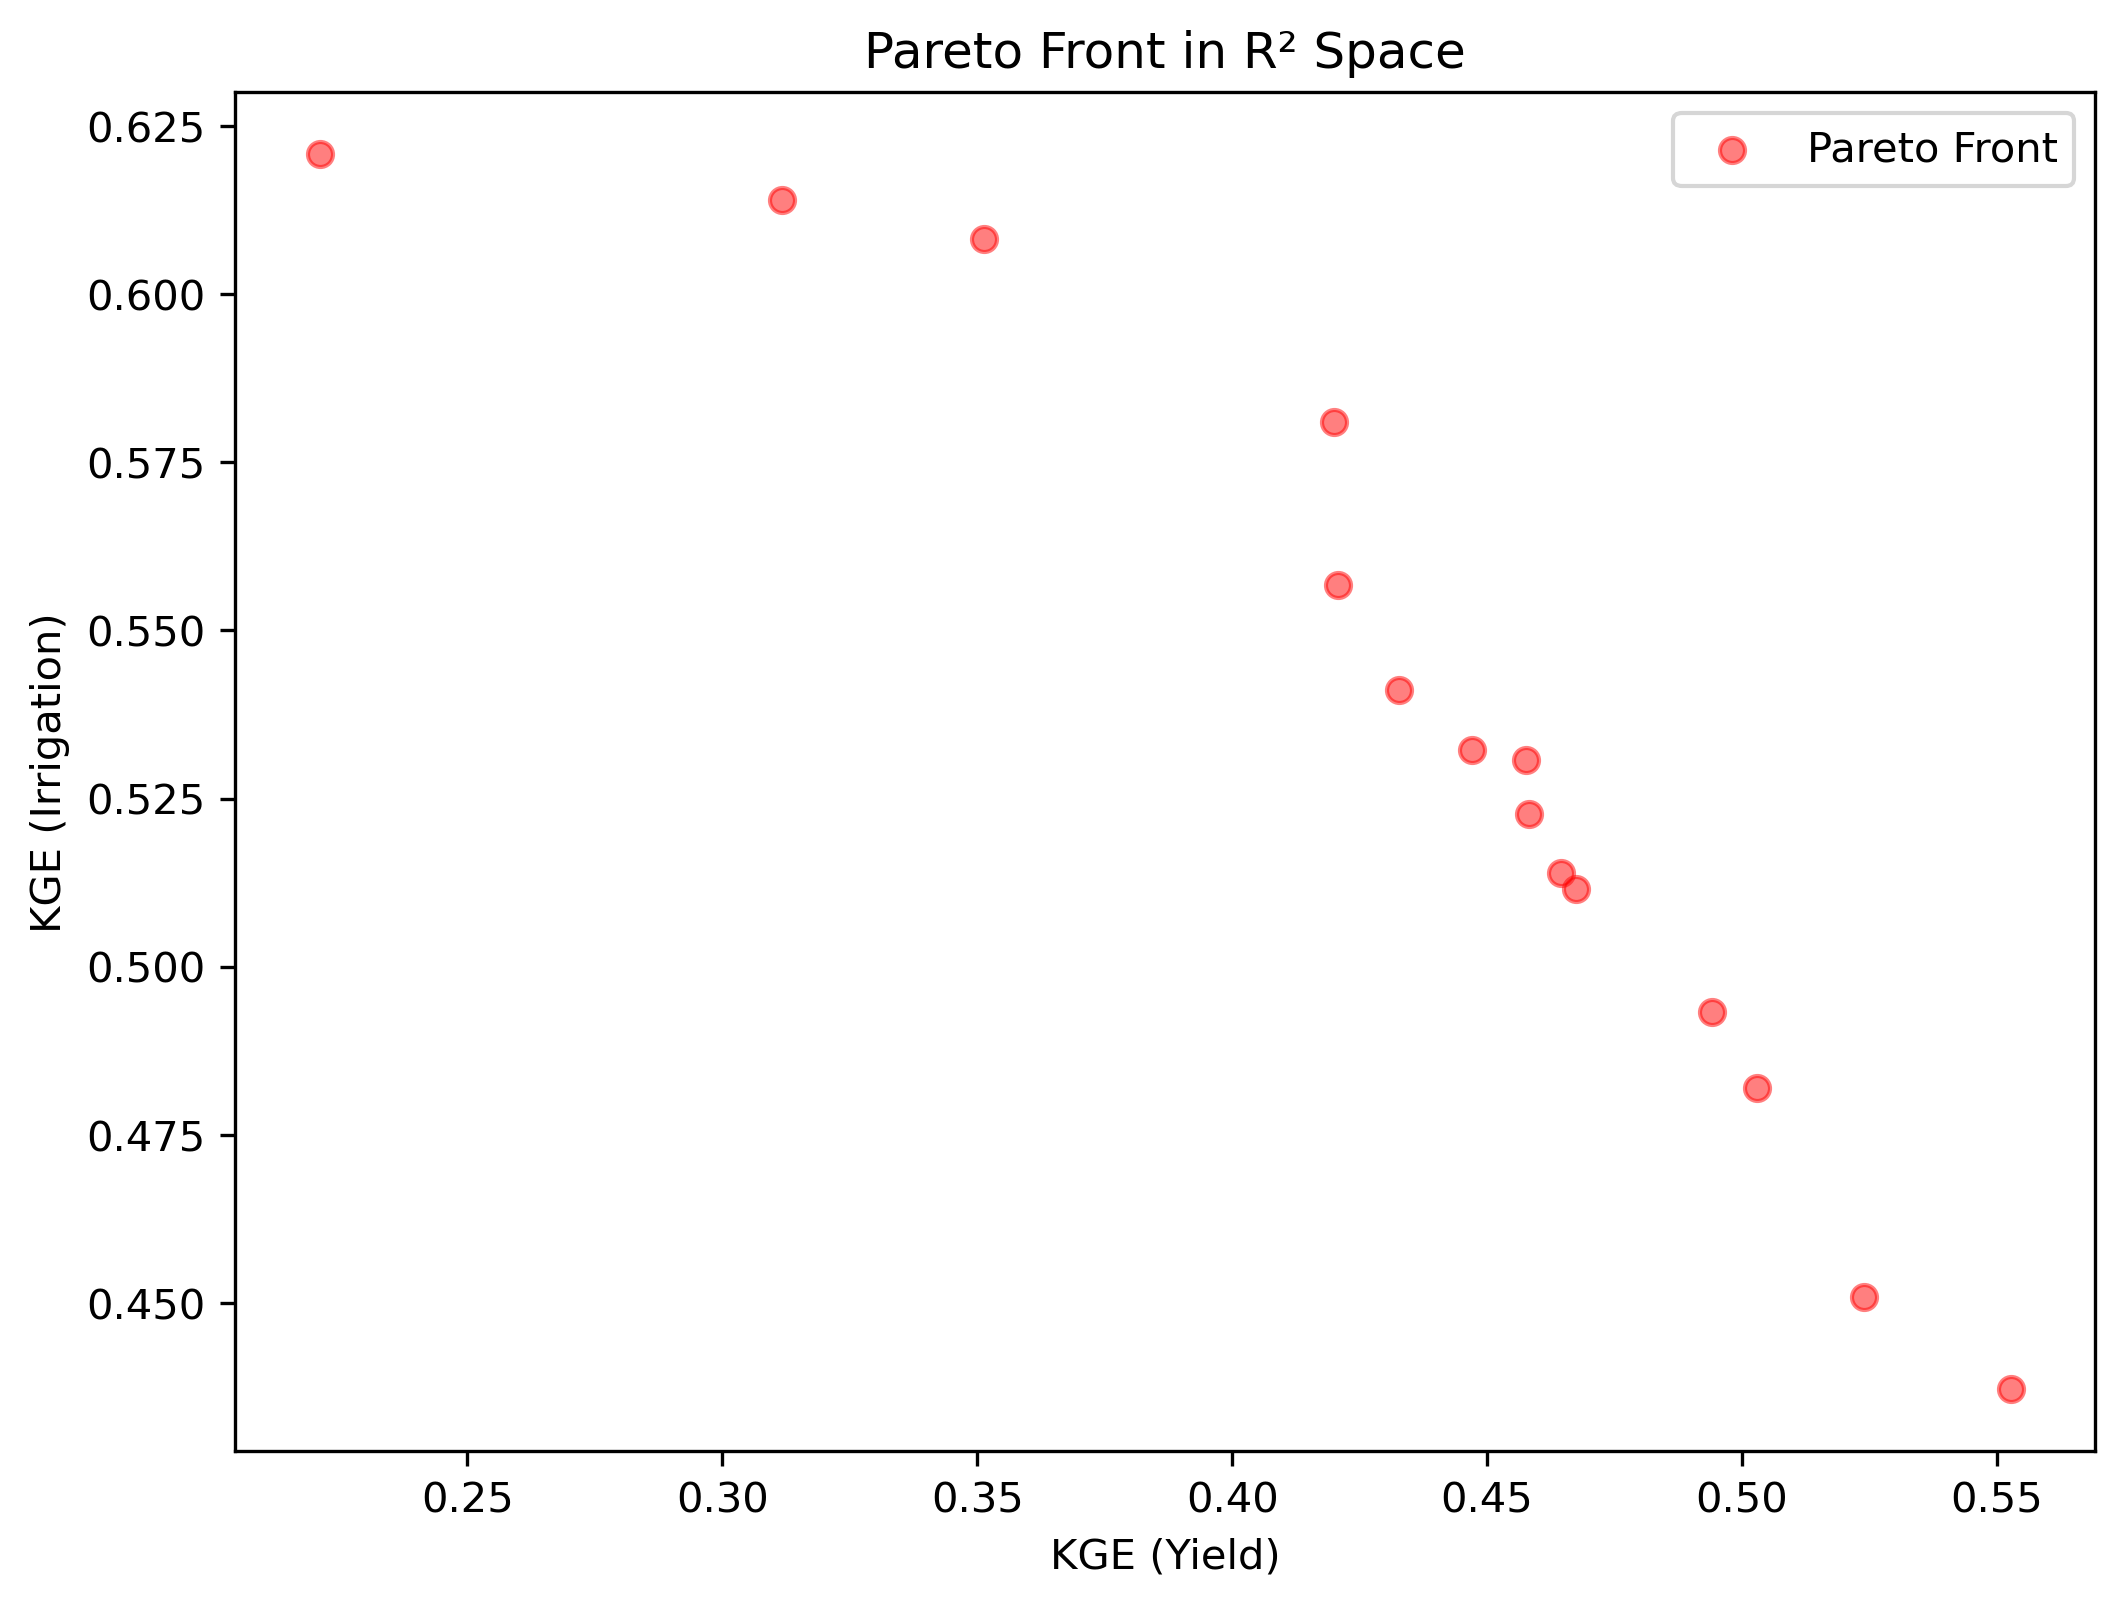

In [14]:
F = res.F  # Shape (n_solutions, 2), columns: [1-R2_Yield, 1-R2_Irrigation]

# Convert back to original R² values
KGE_Yield = 1 - F[:, 0]
KGE_Irrigation = 1 - F[:, 1]

# Scatter plot of all solutions
plt.figure(figsize=(8, 6))
plt.scatter(KGE_Yield, KGE_Irrigation , color='r', alpha=0.5, label="Pareto Front")

plt.xlabel('KGE (Yield)')
plt.ylabel('KGE (Irrigation)')
plt.legend()
plt.title("Pareto Front in R² Space")
plt.show()

In [16]:
results_df = pd.DataFrame(
    {'KGE (Yield)': KGE_Yield, 'KGE (Irrigation)': KGE_Irrigation}
)


# Add SMTs and other parameters
results_df['smt_1'] = res.X[:, 0]
results_df['smt_2'] = res.X[:, 1]
results_df['smt_3'] = res.X[:, 2]
results_df['smt_4'] = res.X[:, 3]
results_df['CCx'] = res.X[:, 4]
results_df['WP'] = res.X[:, 5]
results_df['Kcb'] = res.X[:, 6]
results_df['HI0'] = res.X[:, 7]
results_df['a_HI'] = res.X[:, 8]
results_df['Zmax'] = res.X[:, 9]

# Print the DataFrame with the results
print("Optimization Results:")
results_df.sort_values(by="KGE (Yield)", ascending = False)


Optimization Results:


,KGE (Yield),KGE (Irrigation),smt_1,smt_2,smt_3,smt_4,CCx,WP,Kcb,HI0,a_HI,Zmax
5,0.552674,0.437139,33.778562,62.076068,50.270715,50.978515,0.910484,30.616925,1.000878,0.476707,1.274003,1.757204
1,0.523975,0.450808,33.778562,62.167844,50.270715,50.978515,0.910484,30.616925,1.002250,0.476707,1.274003,1.757204
14,0.502925,0.481899,37.854940,61.222485,57.600683,52.492560,0.965668,32.308778,1.003038,0.492374,3.350428,1.404333
2,0.494023,0.493188,39.457344,63.393331,58.667858,35.520306,0.952431,33.060156,1.005391,0.492019,6.575710,2.398562
0,0.467524,0.511505,39.457344,63.393331,58.667858,35.520306,0.952431,33.060156,1.005391,0.492019,6.951154,2.394182
6,0.464572,0.513927,43.144704,59.657456,64.740003,40.040584,0.862863,30.461693,1.018626,0.484382,4.300535,1.342426
9,0.458285,0.522663,39.288444,63.238604,58.667858,35.520306,0.952431,33.060156,1.005391,0.497463,6.575710,2.398562
7,0.457584,0.530748,39.457344,63.393331,58.667858,35.520306,0.952431,33.060156,1.014538,0.492019,6.951154,2.394182
8,0.447007,0.532263,56.480404,51.507869,58.819415,33.052205,0.855792,30.101818,1.004801,0.465863,6.108061,1.216323
11,0.432710,0.541204,56.816914,61.640532,54.037021,43.971296,0.863180,30.328665,1.037700,0.457963,9.882862,1.572350


In [12]:
## Single objective

class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=1, n_constr=0,  # Change n_obj to 1
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    def _evaluate(self, X, out, *args, **kwargs):
        results = []
        r2_values = []  # Store R² values separately

        for params in X:
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Run AquaCrop model (assuming `for_objf()` is correctly defined)
            _, all_yld_df, simul_reported = for_objf(smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, a_HI=a_HI, Zmax=Zmax, train=False)

            # Compute R² for Yield
            R2_yield = calculate_r2(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')

            # Transform R² for minimization (1 - R²)
            obj_yield = 1 - R2_yield

            results.append([obj_yield])  # Only one objective
            r2_values.append(R2_yield)

        out["F"] = np.array(results)  # Ensure correct shape
        self.r2_results = np.array(r2_values)  # Store R² results for later


# Run the single-objective optimization
problem = AquaCropCalibration()

algorithm = NSGA2(  # Using Genetic Algorithm (GA) instead of NSGA-II since it's now single-objective
    pop_size=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=False
)

termination = get_termination("n_gen", 5)

# Run the optimization
res = minimize(problem, algorithm, termination, seed=1, verbose=True)

# Extract the best solution
best_index = np.argmin(res.F)  # Minimize (1 - R²), so lower is better
best_params = res.X[best_index]
best_r2_yield = problem.r2_results[best_index]

print("\nOptimized Parameters (Best Solution):", best_params)
print("Corresponding R² (Yield):", best_r2_yield)


100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_without_ET: 123
100 prcnt_wi

In [17]:
R2_Yield = 1 - res.F.flatten()  # Ensure it's a 1D array

# Ensure `res.X` is 2D
X_values = np.atleast_2d(res.X)  # Ensures 2D shape even for single-objective case

# Create DataFrame
results_df = pd.DataFrame({
    'R2 (Yield)': R2_Yield,
    'smt_1': X_values[:, 0],
    'smt_2': X_values[:, 1],
    'smt_3': X_values[:, 2],
    'smt_4': X_values[:, 3],
    'CCx': X_values[:, 4],
    'WP': X_values[:, 5],
    'Kcb': X_values[:, 6],
    'HI0': X_values[:, 7],
    'a_HI': X_values[:, 8],
    'Zmax': X_values[:, 9]
})

# Sort by best R² for Yield (descending order)
results_df = results_df.sort_values(by="R2 (Yield)", ascending=False)

# Print the sorted DataFrame
print("Optimization Results:")
print(results_df)

Optimization Results:
   R2 (Yield)      smt_1     smt_2      smt_3      smt_4       CCx         WP  \
0   -0.017634  31.856719  50.33747  59.328791  42.907418  0.975739  33.385277   

        Kcb       HI0      a_HI      Zmax  
0  1.019857  0.492491  9.576617  2.357594  


In [20]:
res.F

array([1.01763363])

In [ ]:
import time 

class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=1, n_constr=0,
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    def _evaluate(self, X, out, *args, **kwargs):
        # Function to evaluate one set of parameters
        def evaluate_solution(params):
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Run AquaCrop model
            _, all_yld_df, simul_reported = for_objf(
                smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, a_HI=a_HI, Zmax=Zmax, train=False
            )

            # Compute R² and transform for minimization
            R2_yield = calculate_r2(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')
            return [1 - R2_yield], R2_yield

        # Parallel execution
        num_jobs = min(len(X), -1)  # Ensures we don't use more processes than data points
        results = Parallel(n_jobs=num_jobs, backend="loky")(delayed(evaluate_solution)(params) for params in X)

        # Store results
        out["F"] = np.array([res[0] for res in results])
        self.r2_results = np.array([res[1] for res in results])
        



## optimization_results

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300

In [22]:
# df = pd.read_csv("Data/NSGA_II_MAE_only_NW.csv")
df = pd.read_csv("Data/NSGA_II_500y500_30to60_with2022.csv").sort_values(by= "MAE (Yield)")
df.iloc[-10:]

,MAE (Yield),MAE (Irrigation),smt_1,smt_2,smt_3,smt_4,CCx,WP,Kcb,HI0,a_HI,Zmax
10,2.242572,40.269439,54.814844,30.000007,46.213611,59.364884,0.954401,30.820504,1.056756,0.513886,0.500047,1.201175
49,2.298254,40.247228,54.807125,30.047430,46.211704,59.370663,0.954429,30.710189,1.056752,0.514387,0.503135,1.201077
40,2.537004,40.088433,54.976005,31.424046,53.933272,57.593601,0.968110,30.600801,1.075459,0.501364,0.500390,1.200008
15,2.537705,40.083796,54.999654,31.414523,53.933272,57.520217,0.968035,30.411421,1.075459,0.505955,0.500123,1.200008
56,2.537904,39.923993,54.976098,31.419975,53.933272,57.559636,0.968035,30.598893,1.075459,0.507386,0.510522,1.200006
19,2.538136,39.887075,54.976098,31.419975,53.933272,57.530164,0.968035,30.598893,1.075459,0.507617,0.510161,1.200006
58,2.547126,39.552428,54.999700,31.420531,53.777476,57.487256,0.968034,30.397861,1.075438,0.515049,0.500024,1.200082
70,2.633792,39.387988,55.000000,31.545588,53.932867,57.423847,0.962914,30.840261,1.075363,0.507353,0.500000,1.200034
36,2.633792,39.387988,54.999996,31.545588,53.932867,57.423847,0.962914,30.840261,1.075363,0.507353,0.500000,1.200034
66,2.633792,39.387988,54.999996,31.545588,53.932867,57.423847,0.962914,30.840261,1.075363,0.507353,0.500000,1.200034


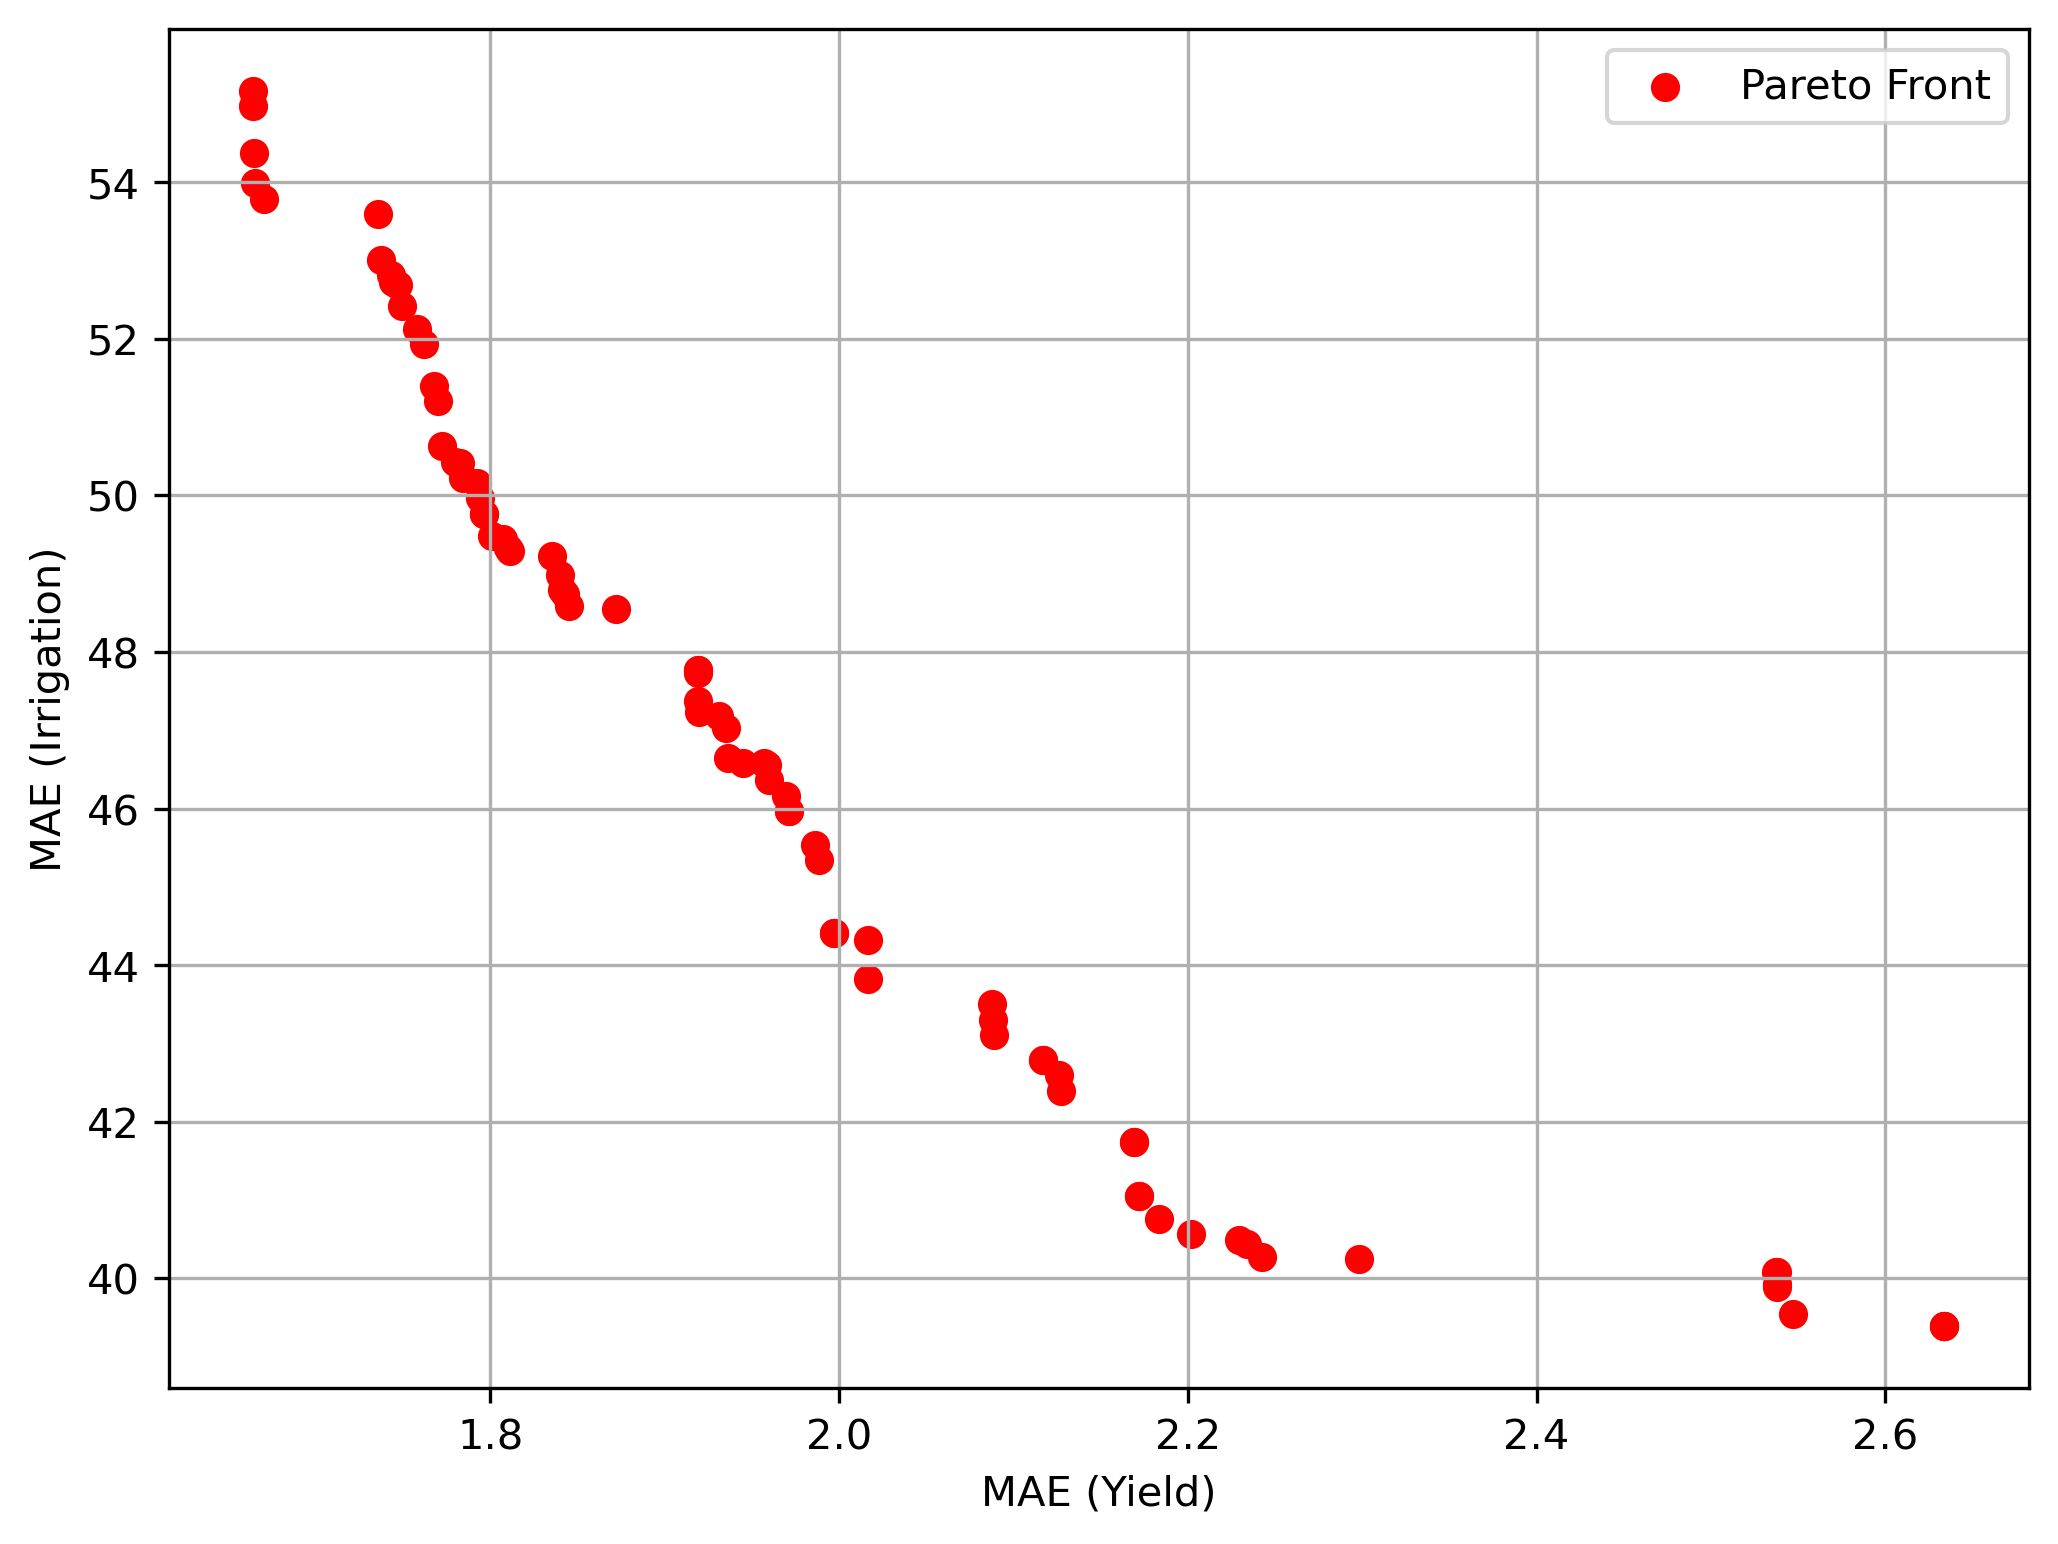

In [6]:


# Scatter plot of all solutions
plt.figure(figsize=(8, 6))
plt.scatter(df["MAE (Yield)"], df["MAE (Irrigation)"], color='r', label="Pareto Front")

plt.xlabel('MAE (Yield)')
plt.ylabel('MAE (Irrigation)')
plt.legend()
plt.grid()

In [6]:
# df = pd.read_csv("Data/NSGA_II_NW_no_WC_no2012_.csv")
# df

In [7]:
# plt.figure(figsize=(8, 6))
# plt.scatter(df["R2 (Yield)"], df["R2 (Irrigation)"], color='r', alpha=0.5, label="Pareto Front")

# plt.xlabel('R2 (Yield)')
# plt.ylabel('R2 (Irrigation)')
# plt.legend()


## opt_CRC

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.termination.default import DefaultMultiObjectiveTermination
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.termination import get_termination
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import Aq_Optimization_functons
from Aq_Optimization_functons import *

from joblib import Parallel, delayed
import time

class AquaCropCalibration(Problem):
    def __init__(self):
        super().__init__(n_var=10, n_obj=2, n_constr=0, 
                         xl=[30, 50, 50, 30, 0.85, 30, 1.0, 0.45, 0.5, 1.20], 
                         xu=[60, 65, 65, 60, 0.98, 35, 1.10, 0.55, 10, 2.5])

    def _evaluate(self, X, out, *args, **kwargs):
        # Define function to evaluate a single parameter set
        def evaluate_solution(params):
            smt_1, smt_2, smt_3, smt_4, CCx, WP, Kcb, HI0, a_HI, Zmax = params
            smt = [smt_1, smt_2, smt_3, smt_4]

            # Run AquaCrop model (assuming for_objf() is correctly defined)
            _, all_yld_df, simul_reported = for_objf(
                smt=smt, CCx=CCx, WP=WP, Kcb=Kcb, HI0=HI0, a_HI=a_HI, Zmax=Zmax, train=False
            )

            # Compute MAE values
            mae_yield = calculate_mae(simul_reported, 'Yield (tonne/ha)', 'Reported_Yield')
            mae_irrigation = calculate_mae(simul_reported, 'Seasonal irrigation (mm)', 'Reported_Irrigation')

            return [mae_yield, mae_irrigation]

        # Start time tracking
        start_time = time.time()

        # Parallel execution using all available cores
        num_jobs = 8 # Uses all available cores
        results = Parallel(n_jobs=num_jobs, backend="loky")(
            delayed(evaluate_solution)(params) for params in X
        )

        out["F"] = np.array(results)




def calculate_mae(df, sim_col, obs_col):
    df = df.dropna(subset=[sim_col, obs_col])
    obs = df[obs_col].values
    sim = df[sim_col].values
    return np.mean(np.abs(obs - sim))


# Define problem
start_time = time.time()

problem = AquaCropCalibration()

# Configure the algorithm
algorithm = NSGA2(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.6, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

# Define termination criteria
termination = get_termination("n_gen", 200)

# Run the optimization
res = minimize(problem, algorithm, termination, seed=1, verbose=True)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time elapsed for parallel evaluation: {elapsed_time / 3600:.2f} hours")





best_index = np.argmin(res.F[:, 1])
best_params = res.X[best_index]
best_mae_values = res.F[best_index]


print("\nOptimized Parameters (Best Solution):", best_params)
print("Corresponding MAE (Yield, Irrigation):", best_mae_values)

F = res.F  # Shape (n_solutions, 2), columns: [Yield, Irrigation]
results_df = pd.DataFrame(res.F, columns=['MAE (Yield)', 'MAE (Irrigation)'])


# Add SMTs and other parameters
results_df['smt_1'] = res.X[:, 0]
results_df['smt_2'] = res.X[:, 1]
results_df['smt_3'] = res.X[:, 2]
results_df['smt_4'] = res.X[:, 3]
results_df['CCx'] = res.X[:, 4]
results_df['WP'] = res.X[:, 5]
results_df['Kcb'] = res.X[:, 6]
results_df['HI0'] = res.X[:, 7]
results_df['a_HI'] = res.X[:, 8]
results_df['Zmax'] = res.X[:, 9]


print(results_df)
results_df.to_csv('output_data/NSGA_II_MAE__NW_withoutWC50/200.csv', index=False)



import matplotlib.pyplot as plt

# Extract objective values from the optimization result
F = res.F  # Shape (n_solutions, 2), columns: [mae_Yield, mae_Irrigation]

plt.figure(figsize=(8, 6))
plt.scatter(F[:, 0], F[:, 1], color='g', alpha=0.5, label="Pareto Front")

plt.xlabel('MAE (Yield)')
plt.ylabel('MAE (Irrigation)')
plt.legend()
plt.title("Pareto Front and Non-Pareto Solutions")


# Save the figure before showing it
plt.savefig('output_data/NSGA_II_MAE__NW_withoutWC50/200.png', dpi=300, bbox_inches='tight')  # Change 'png' to 'jpg' or 'pdf' if needed

plt.show()